My code personal 

Populating the interactive namespace from numpy and matplotlib


/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'eigh']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


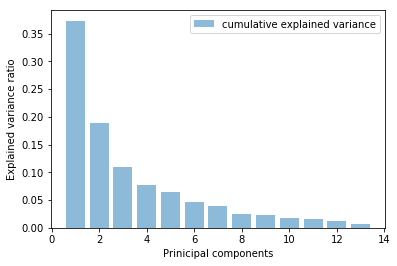

Section: Feature Transformation
--------------------------------------------------
Matrix W:
 [[ 0.1467  0.5042]
 [-0.2422  0.2422]
 [-0.0299  0.287 ]
 [-0.2552 -0.0647]
 [ 0.1208  0.23  ]
 [ 0.3893  0.0936]
 [ 0.4233  0.0109]
 [-0.3063  0.0187]
 [ 0.3057  0.0304]
 [-0.0987  0.5453]
 [ 0.3003 -0.2792]
 [ 0.3682 -0.1744]
 [ 0.2926  0.3632]]


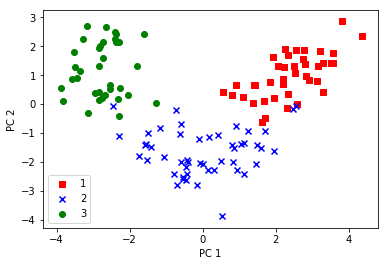

Dot product:
 [ 2.5989  0.0048]


In [149]:
# Note that PCA is an unsupervised method, which means that information about the class labels is ignored. It shows clear contrast compared with a random forest which uses the class 
# membership information to compute the node impurities, variance measures the spread of values along a feature axis. Recall we did the following for random forest:

%pylab inline
import pandas as pd

wine = pd.read_csv('wine.csv',names=['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'])   

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# It's shortcut for typing all of below commands which in essence adds numpy and matplotlib in to your session. 
x= wine.iloc[:, 1:].values 
y = wine.iloc[:, 0].values
# Selecting data by row numbers (.iloc), first column with all rows and first column of data frame 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# We process the Wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
# Construct the covariance matrix dataset using the numpy.cov() function.
# this is symmetric with d×d d-dimension, where d is the dataset dimension. 
# The covariance matrix earn eigenvalues from 13x13 and 13 eigenvectors

# The eigenvectors of the covariance matrix represent the principal components, while the corresponding eigenvalues will define their magnitude.

covariant_matrix = np.cov(x_train_std.T)
# We create the covariance matrix dataset using the numpy.cov() function.

eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)
# Also we use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix
# We only select the subset of the eigenvectors (principal components) that contains most of the information (variance) to compressing the data
# set onto a new feature subspace.

tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# We use NumPy "cumsum()" to calculate the cumulative sum of explained variances, which we will plot via matplotlib's "step()" function


bar(range(1,14), var_exp, alpha=0.5, align='center',
label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Prinicipal components')
legend(loc='best')
show()
# The plot shows that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two 
# principal components combined explain almost 60 percent of the variance in the data.

print(50 * '=')
print('Section: Feature Transformation')
print(50 * '-')

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i])
               for i in range(len(eigen_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)


eigen_pairs[:5]

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
# we want to transform the Wine dataset onto the new principal component axes.
# sorting the eigen-pairs by decreasing order of the eigenvalues:

# Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in 
# this dataset. we've created a 13×2 projection matrix from the top two eigenvectors.

x_train_pca = x_train_std.dot(w)
x_train_std.shape, w.shape, x_train_pca.shape

# In the same way, we can transform the entire 124×13 training dataset onto the two principal components by calculating 
# the matrix dot product:

print('Matrix W:\n', w)

x_train_pca = x_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(x_train_pca[y_train == l, 0],
                x_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')

plt.show()

# Finally, it's time to visualize the transformed Wine training set, now stored as an 124×2
# matrix, in a two-dimensional scatterplot:

print('Dot product:\n', x_train_std[0].dot(w))


# Bibliography
# scikit-learn : Data Compression via Dimensionality Reduction I - Principal component analysis (PCA) - 2018. (2018). Bogotobogo.com. Recuperado 26 February 2018, a partir de http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_a


  

The steps of PCA algorithm for dimensionality reduction:

1.- Standardize the d-dimensional dataset.
2.- Construct the covariance matrix.
3.- Decompose the covariance matrix into its eigenvectors and eigenvalues.
4.- Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k≤d ).
5.-Construct a projection matrix W from the "top" k eigenvectors.
6.-Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace.

we can see 3 groups of wine that we can suppose according to the analysis that are graded by green, red and purple grapes, 13 categories of the properties of the wines are shown which we assign to alcohol, melic acid, Ash, Acl, Mg, Phenols, Flavanoids, Nonflavanoid phenols, Phenols, Proanth, Color.int, Hue, OD, Proline.

We saw in which of the 3 types of grapes the data is concentrated by means of the elimination of a dimension (vector), this helps for its analysis since it eliminates the components that are not main.

The choice of factors is made in such a way that the first one picks up as much as possible of the original variability; the second factor must collect the maximum possible variability not collected by the first, and so on. Of the total of factors, those that collect the percentage of variability that is considered sufficient will be chosen. These will be called principal components.

It can be intuited that the values ​​that contribute the most to the information are the first 3 since others only contribute less than 7%, this corresponds to the characteristics of alcohol, melic acid and Ash

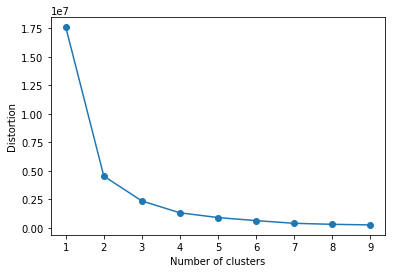

[2 0 1 1 0 1 1 2 1 1 0 0 1 0 2 0 2 0 2 2 0 2 1 1 0 0 0 1 1 2 1 0 0 0 0 0 2
 2 0 2 1 2 1 2 2 0 2 0 0 2 1 0 2 0 0 0 1 2 1 1 2 2 0 1 2 2 0 0 2 2 2 1 0 2
 0 1 2 0 1 1 2 0 1 2 1 0 2 2 0 2 1 0 1 2 1 1 1 2 0 0 0 0 1 1 0 0 2 0 1 1 2
 2 1 0 0 0 2 2 2 0 0 0 2 1]


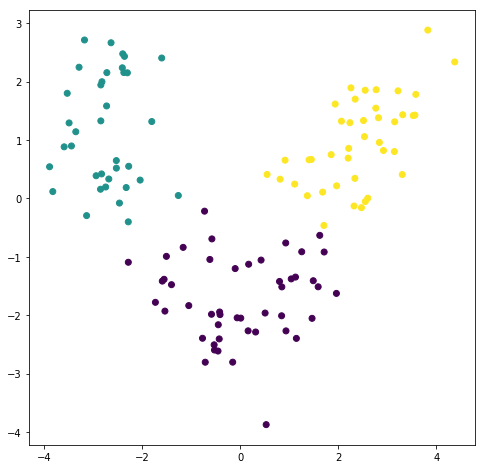

In [150]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

X = wine[wine.columns]
x_cols = wine.columns

# I'll use the elbow method to find the optimal number of clusters. 
# This identifies the value of k (number of clusters) where the distortion 
# (the within-cluster sum of squared errors or SSE) begins to increase the most rapidly.

distortions = []
for i in range (1,10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# It looks like the elbow is located at k=3... We can also use the silhouette score;
# this is a measure of how similar an objects is to its own cluster compared to other clusters. 
# The score is higher when clusters are dense and well separated. A score of 1 is the highest and 
# a score of -1 is the lowest. Scores around zero indicate overlapping clusters.

cluster3 = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=0)


data = array(x_train_pca)

model = KMeans(n_clusters=3)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

a cluster of size 3 was chosen due to the type of grapes this helped to separate the data into groups, so this improves our analysis because it confirms that the data is concentrated in the first 3 categories (Alcohol, malic acid and ash).

CODE TO HELP ME, this is just an example of my code so this it's just to complementate the information.

Section: Unsupervised dimensionality reduction via principal component analysis
--------------------------------------------------
Wine data excerpt:

:    Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
1            1    14.23        1.71  2.43               15.6        127   
2            1    13.20        1.78  2.14               11.2        100   
3            1    13.16        2.36  2.67               18.6        101   
4            1    14.37        1.95  2.50               16.8        113   
5            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
1           2.80        3.06                  0.28             2.29   
2           2.65        2.76                  0.26             1.28   
3           2.80        3.24                  0.30             2.81   
4           3.85        3.49                  0.24             2.18   
5           2.80        2.69             

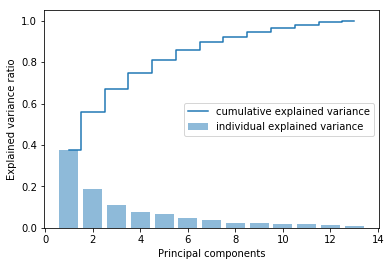

Section: Feature Transformation
--------------------------------------------------
Matrix W:
 [[ 0.1467  0.5042]
 [-0.2422  0.2422]
 [-0.0299  0.287 ]
 [-0.2552 -0.0647]
 [ 0.1208  0.23  ]
 [ 0.3893  0.0936]
 [ 0.4233  0.0109]
 [-0.3063  0.0187]
 [ 0.3057  0.0304]
 [-0.0987  0.5453]
 [ 0.3003 -0.2792]
 [ 0.3682 -0.1744]
 [ 0.2926  0.3632]]


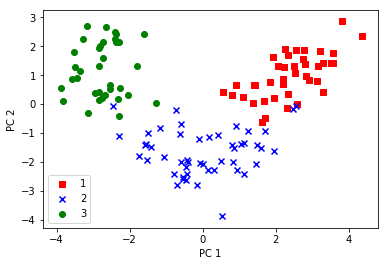

Dot product:
 [ 2.5989  0.0048]
Section: Principal component analysis in scikit-learn
--------------------------------------------------
Variance explained ratio:
 [ 0.3733  0.1882  0.109   0.0772  0.0648  0.0459  0.0399  0.0252  0.0226
  0.0183  0.0164  0.0128  0.0064]


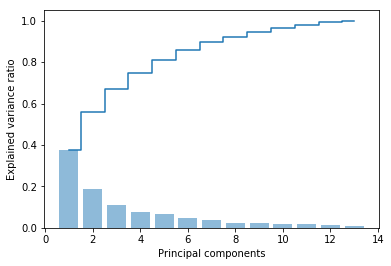

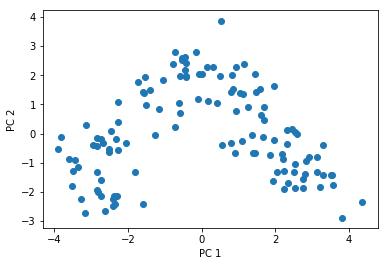

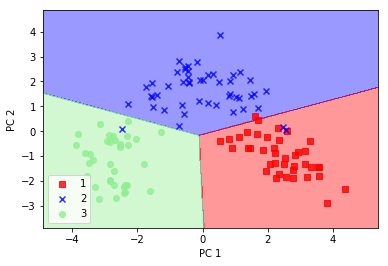

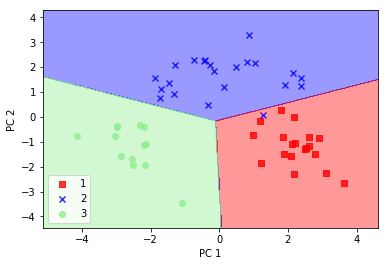

Explaind variance ratio:
 [ 0.3733  0.1882  0.109   0.0772  0.0648  0.0459  0.0399  0.0252  0.0226
  0.0183  0.0164  0.0128  0.0064]
Section: Supervised data compression via linear discriminant analysis - Computing the scatter matrices
--------------------------------------------------
MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]

Within-class scatter matrix: 13x13
Class label distribution: [40 49 35]
Scaled within-class scatter matrix: 13x13
Between-class scatter matrix: 13x13
Section: Selecting linear discriminants for the new feature subspace
--------------------------------------------------
Eigenvalues in decreasing order:

452.721581245
156.43636122
7.05575044266e-14
5.68434188608e-14
3.41

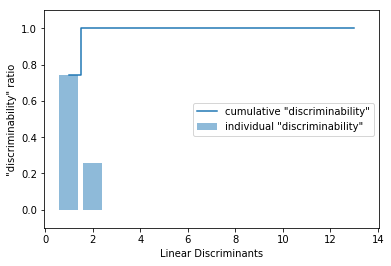

Matrix W:
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]
Section: Projecting samples onto the new feature space
--------------------------------------------------


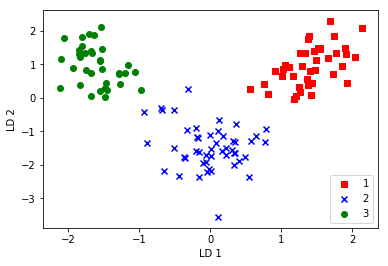

Section: LDA via scikit-learn
--------------------------------------------------


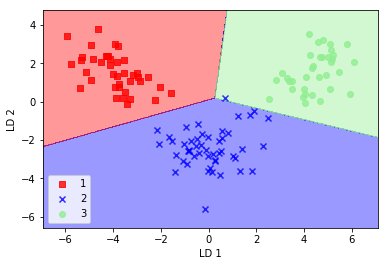

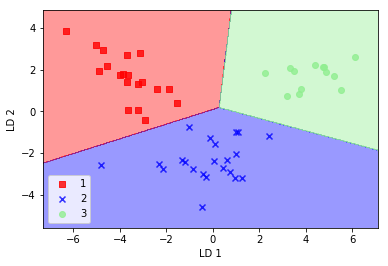

Section: Implementing a kernel principal component analysis in Python
--------------------------------------------------
Section: Example 1: Separating half-moon shapes
--------------------------------------------------


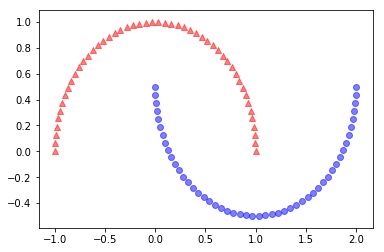

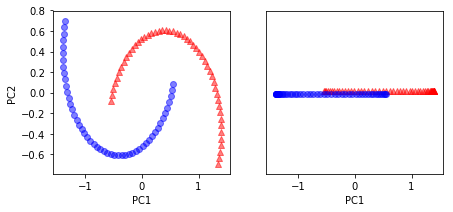

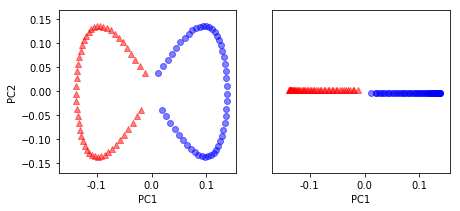

Section: Example 2: Separating concentric circles
--------------------------------------------------


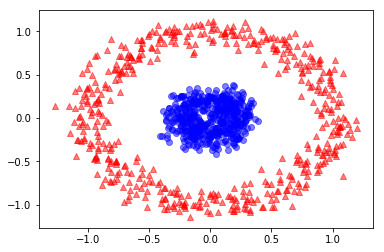

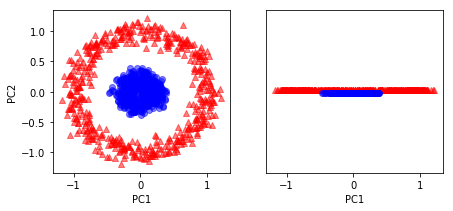

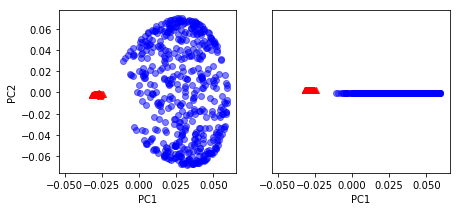

Section: Projecting new data points
--------------------------------------------------
New data point x_new: [ 1.8713  0.0093]
Original projection x_proj: [ 0.0788]
Reprojection x_reproj: [ 0.0788]


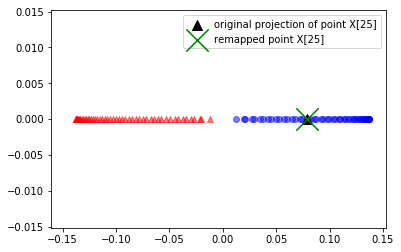

Section: Kernel principal component analysis in scikit-learn
--------------------------------------------------


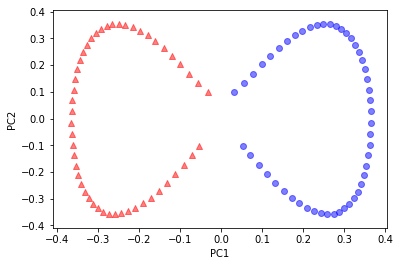

In [151]:
# Sebastian Raschka, 2015 (http://sebastianraschka.com)
# Python Machine Learning - Code Examples
#
# Chapter 5 - Compressing Data via Dimensionality Reduction
#
# S. Raschka. Python Machine Learning. Packt Publishing Ltd., 2015.
# GitHub Repo: https://github.com/rasbt/python-machine-learning-book
#
# License: MIT
# https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from matplotlib.ticker import FormatStrFormatter

# for sklearn 0.18's alternative syntax
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
    from sklearn.lda import LDA
else:
    from sklearn.model_selection import train_test_split
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#############################################################################
print(50 * '=')
print('Section: Unsupervised dimensionality reduction'
      ' via principal component analysis')
print(50 * '-')

df_wine = pd.read_csv('wine.csv',names=['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'])   

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

print('Wine data excerpt:\n\n:', df_wine.head())


X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


#############################################################################
print(50 * '=')
print('Section: Total and explained variance')
print(50 * '-')

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
# plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

#############################################################################
print(50 * '=')
print('Section: Feature Transformation')
print(50 * '-')

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
# plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

print('Dot product:\n', X_train_std[0].dot(w))


#############################################################################
print(50 * '=')
print('Section: Principal component analysis in scikit-learn')
print(50 * '-')

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print('Variance explained ratio:\n', pca.explained_variance_ratio_)

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
# plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
# plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
print('Explaind variance ratio:\n', pca.explained_variance_ratio_)


#############################################################################
print(50 * '=')
print('Section: Supervised data compression via linear discriminant analysis'
      ' - Computing the scatter matrices')
print(50 * '-')

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))


d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

print('Class label distribution: %s'
      % np.bincount(y_train)[1:])

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))


mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))


#############################################################################
print(50 * '=')
print('Section: Selecting linear discriminants for the new feature subspace')
print(50 * '-')

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
# plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)


#############################################################################
print(50 * '=')
print('Section: Projecting samples onto the new feature space')
print(50 * '-')

X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
# plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()


#############################################################################
print(50 * '=')
print('Section: LDA via scikit-learn')
print(50 * '-')

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
# plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
# plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()


#############################################################################
print(50 * '=')
print('Section: Implementing a kernel principal component analysis in Python')
print(50 * '-')


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
      Tuning parameter of the RBF kernel
    n_components: int
      Number of principal components to return
    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc


#############################################################################
print(50 * '=')
print('Section: Example 1: Separating half-moon shapes')
print(50 * '-')

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

# plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

# plt.tight_layout()
# plt.savefig('./figures/half_moon_2.png', dpi=300)
plt.show()

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# plt.tight_layout()
# plt.savefig('./figures/half_moon_3.png', dpi=300)
plt.show()


#############################################################################
print(50 * '=')
print('Section: Example 2: Separating concentric circles')
print(50 * '-')

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

# plt.tight_layout()
# plt.savefig('./figures/circles_1.png', dpi=300)
plt.show()

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

# plt.tight_layout()
# plt.savefig('./figures/circles_2.png', dpi=300)
plt.show()


X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

# plt.tight_layout()
# plt.savefig('./figures/circles_3.png', dpi=300)
plt.show()


#############################################################################
print(50 * '=')
print('Section: Projecting new data points')
print(50 * '-')


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
      Tuning parameter of the RBF kernel
    n_components: int
      Number of principal components to return
    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset
     lambdas: list
       Eigenvalues
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i]
                              for i in range(1, n_components + 1)))

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components + 1)]

    return alphas, lambdas


X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)


x_new = X[25]
print('New data point x_new:', x_new)

x_proj = alphas[25]  # original projection
print('Original projection x_proj:', x_proj)


def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)


# projection of the "new" datapoint
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print('Reprojection x_reproj:', x_reproj)

plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

# plt.tight_layout()
# plt.savefig('./figures/reproject.png', dpi=300)
plt.show()


#############################################################################
print(50 * '=')
print('Section: Kernel principal component analysis in scikit-learn')
print(50 * '-')


X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.tight_layout()
# plt.savefig('./figures/scikit_kpca.png', dpi=300)
plt.show()